# Part 1

## 1. 

There are **two** classes (Kecimen and Besni) in this dataset.

## 2.

The log odds is defined as:

$$
log \frac{P(C_{1}|x)}{P(C_{2}|x)}
$$

The total of 900 raisin grains were used ($C_{1}$ = 450; $C_{2}$ = 450)

$$
log \frac{\frac{450}{900}}{\frac{450}{900}} = log(1) = 0
$$

The discriminant function is defined as:

$$
g(x) = log \frac{P(C_{1}|x)}{P(C_{2}|x)}
$$

Since g(x) = 0, choose $C_{2}$

Log odds is the sum of log likelihood ratio and log of prior ratio:

$$
g(x) = log \frac{p(x|C_{1})}{p(x|C_{2})} + log \frac{P(C_{1})}{P(C_{2})}
$$

Since the priors are equal from the data ($P(C_{1}) = P(C_{2}) = 0.5$), the discriminant is the log likelihood ratio.

## 3.

In [21]:
import numpy as np
import pandas as pd
import csv
from scipy.stats import multivariate_normal

In [23]:
# Show the data
df = pd.read_csv(r"C:\Users\nick8\Downloads\Raisin_Dataset.csv")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [24]:
df.shape

(900, 8)

###### Calculate the mean vector and covariance matrix for the input attributes in each class

##### For the first class (Kecimen):

In [25]:
Kecimen = df[df["Class"]=='Kecimen']
Kecimen.shape

(450, 8)

In [26]:
data1 = Kecimen.iloc[:, :-1].values
data1.shape


(450, 7)

Mean vector:

In [27]:
# Calculate mean vector
mean1 = Kecimen['Area'].mean()
mean2 = Kecimen['MajorAxisLength'].mean()
mean3 = Kecimen['MinorAxisLength'].mean()
mean4 = Kecimen['Eccentricity'].mean()
mean5 = Kecimen['ConvexArea'].mean()
mean6 = Kecimen['Extent'].mean()
mean7 = Kecimen['Perimeter'].mean()
mean = [mean1, mean2, mean3, mean4, mean5, mean6, mean7]
array1 = np.array(mean)
array1

array([6.34134667e+04, 3.52859249e+02, 2.29352592e+02, 7.41959536e-01,
       6.56963556e+04, 7.07774246e-01, 9.83686236e+02])

In [28]:
array1.shape

(7,)

Covariance matrix:

In [29]:
# Calculate covariance matrix
cov1 = np.cov(data1,rowvar=False)
cov1

array([[ 3.14273786e+08,  9.48747383e+05,  5.26930055e+05,
         1.22544439e+02,  3.34178076e+08, -2.07582479e+00,
         2.54722952e+06],
       [ 9.48747383e+05,  3.55353016e+03,  1.18448636e+03,
         2.51733540e+00,  1.03802111e+06, -5.20182414e-01,
         8.54753908e+03],
       [ 5.26930055e+05,  1.18448636e+03,  1.15999213e+03,
        -1.20695931e+00,  5.46132789e+05,  3.02579660e-01,
         3.86602972e+03],
       [ 1.22544439e+02,  2.51733540e+00, -1.20695931e+00,
         8.53068902e-03,  1.67623514e+02, -1.48948577e-03,
         2.94190389e+00],
       [ 3.34178076e+08,  1.03802111e+06,  5.46132789e+05,
         1.67623514e+02,  3.61223925e+08, -4.86447443e+01,
         2.79465818e+06],
       [-2.07582479e+00, -5.20182414e-01,  3.02579660e-01,
        -1.48948577e-03, -4.86447443e+01,  1.88722736e-03,
        -1.03066330e+00],
       [ 2.54722952e+06,  8.54753908e+03,  3.86602972e+03,
         2.94190389e+00,  2.79465818e+06, -1.03066330e+00,
         2.2591752

In [30]:
cov1.shape

(7, 7)

##### For the second class (Besni):

In [31]:
Besni = df[df["Class"]=='Besni']
Besni.shape

(450, 8)

In [32]:
data2 = Besni.iloc[:, :-1].values
data2.shape

(450, 7)

Mean vector:

In [33]:
# Calculate mean vector
mean1 = Besni['Area'].mean()
mean2 = Besni['MajorAxisLength'].mean()
mean3 = Besni['MinorAxisLength'].mean()
mean4 = Besni['Eccentricity'].mean()
mean5 = Besni['ConvexArea'].mean()
mean6 = Besni['Extent'].mean()
mean7 = Besni['Perimeter'].mean()
mean = [mean1, mean2, mean3, mean4, mean5, mean6, mean7]
array2 = np.array(mean)
array2

array([1.12194789e+05, 5.09000652e+02, 2.79623674e+02, 8.21124764e-01,
       1.16675824e+05, 6.91241607e-01, 1.34812704e+03])

In [34]:
array2.shape

(7,)

Covariance matrix:

In [35]:
# Calculate covariance matrix
cov2 = np.cov(data2,rowvar=False)
cov2

array([[ 1.53898489e+09,  3.68653571e+06,  1.78347214e+06,
         3.12843878e+02,  1.59035722e+09,  3.49850895e+02,
         9.09633000e+06],
       [ 3.68653571e+06,  1.11875370e+04,  3.33731160e+03,
         3.53459402e+00,  3.92432667e+06, -7.18686096e-01,
         2.51395741e+04],
       [ 1.78347214e+06,  3.33731160e+03,  2.57694886e+03,
        -1.03758907e+00,  1.82437853e+06,  8.91603365e-01,
         9.62506715e+03],
       [ 3.12843878e+02,  3.53459402e+00, -1.03758907e+00,
         4.66176366e-03,  3.77209355e+02, -1.34578452e-03,
         4.77191184e+00],
       [ 1.59035722e+09,  3.92432667e+06,  1.82437853e+06,
         3.77209355e+02,  1.66440074e+09,  2.31806348e+02,
         9.71971332e+06],
       [ 3.49850895e+02, -7.18686096e-01,  8.91603365e-01,
        -1.34578452e-03,  2.31806348e+02,  3.69986821e-03,
        -1.03347915e+00],
       [ 9.09633000e+06,  2.51395741e+04,  9.62506715e+03,
         4.77191184e+00,  9.71971332e+06, -1.03347915e+00,
         6.0912516

In [36]:
cov2.shape

(7, 7)

## 4.

In [37]:
# Multivariate normal distribution
# For Kecimen:
result1 = np.random.multivariate_normal(array1, cov1, size=10)
result1

array([[3.88254195e+04, 2.79492295e+02, 2.00637351e+02, 6.75821606e-01,
        4.19144570e+04, 6.40060553e-01, 8.16679874e+02],
       [9.31829050e+04, 4.41530356e+02, 2.75245919e+02, 7.12719413e-01,
        1.01343943e+05, 7.62139197e-01, 1.26182860e+03],
       [6.89104737e+04, 3.89892971e+02, 2.19538182e+02, 8.40062814e-01,
        7.06638940e+04, 7.27216332e-01, 1.04161694e+03],
       [4.46577993e+04, 2.89222522e+02, 2.10745688e+02, 6.29761973e-01,
        4.75217575e+04, 7.09152591e-01, 8.29934254e+02],
       [5.83824403e+04, 3.37584620e+02, 2.24447147e+02, 7.41566660e-01,
        6.13296929e+04, 6.63441918e-01, 9.44753102e+02],
       [5.72255819e+04, 2.79946790e+02, 2.46649364e+02, 5.88681919e-01,
        5.53105450e+04, 7.41071302e-01, 8.25542832e+02],
       [7.67844455e+04, 3.83485310e+02, 2.58511201e+02, 7.33898173e-01,
        7.74010940e+04, 6.88869653e-01, 1.07604397e+03],
       [3.61070208e+04, 3.39026388e+02, 1.40517217e+02, 9.39207869e-01,
        4.04852573e+04, 6

In [38]:
result1.shape

(10, 7)

In [39]:
# For Besni:
result2 = np.random.multivariate_normal(array2, cov2, size=10)
result2

array([[1.03394104e+05, 4.79999151e+02, 2.79878450e+02, 8.06268719e-01,
        1.08800066e+05, 6.78261776e-01, 1.30087582e+03],
       [1.47877666e+05, 5.49811058e+02, 3.16929111e+02, 8.54836665e-01,
        1.43476206e+05, 8.05714499e-01, 1.36573752e+03],
       [7.78895822e+04, 3.61869544e+02, 2.60314119e+02, 7.94034549e-01,
        7.89252384e+04, 7.07080072e-01, 1.01397991e+03],
       [1.55682868e+05, 6.62718240e+02, 3.09046611e+02, 8.72010131e-01,
        1.60968278e+05, 6.06666408e-01, 1.63277897e+03],
       [6.27849697e+04, 4.19401488e+02, 2.09751871e+02, 9.01615483e-01,
        6.39059445e+04, 5.96805222e-01, 1.13147866e+03],
       [1.19214797e+05, 4.90790459e+02, 3.24265344e+02, 7.47869800e-01,
        1.25697265e+05, 6.93754933e-01, 1.38546742e+03],
       [1.50059818e+05, 6.20085718e+02, 3.44311191e+02, 7.88209235e-01,
        1.60665754e+05, 7.01693472e-01, 1.68616488e+03],
       [1.71747041e+05, 7.30939106e+02, 3.19687390e+02, 9.25719014e-01,
        1.81963826e+05, 5

In [40]:
result2.shape

(10, 7)

## 5.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [42]:
#mean_K = array1  # mean vector and covariance matrix of all categories for Kecimen
#cov_K = cov1

# the mean vector and covariance matrix of all categories for Besni
#mean_B = array2
#cov_B = cov2

data = df[['MajorAxisLength','MinorAxisLength','Class']]

# the mean vector and covariance matrix of "MajorAxisLength" and "MinorAxisLength" for Kecimen
mu_K = np.array(data[data['Class'] == 'Kecimen'].iloc[:,0:2].mean())
cov_K = np.array(data[data['Class'] == 'Kecimen'].iloc[:,0:2].cov())
print('mean vector:', mu_K)
print()
print('covariance matrix:', cov_K)

mean vector: [352.85924899 229.3525921 ]

covariance matrix: [[3553.53016395 1184.48636406]
 [1184.48636406 1159.99212816]]


In [43]:
# the mean vector and covariance matrix of "MajorAxisLength" and "MinorAxisLength" for Besni
mu_B = np.array(data[data['Class'] == 'Besni'].iloc[:,0:2].mean())
cov_B = np.array(data[data['Class'] == 'Besni'].iloc[:,0:2].cov())
print('mean vector:', mu_B)
print()
print('covariance matrix:', cov_B)

mean vector: [509.00065201 279.6236737 ]

covariance matrix: [[11187.53700042  3337.31160318]
 [ 3337.31160318  2576.9488606 ]]


**Using MATLAB (with its codes) to generate the visualization of the joint distribution for each class:**

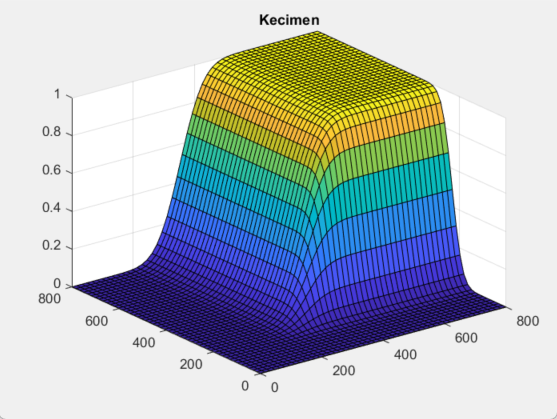

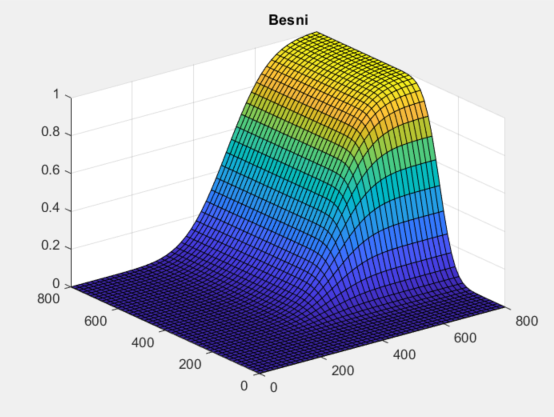

Based on the distribution, "MajorAxisLength" and "MinorAxisLength" are not both univariate normal because the CDF (cumulative distribution function) plots above seem to exhibit an S-shaped curve that starts near 0, rises gradually, and approaches 1. Therefore, this is typical of normal distributions and the plots show the CDFs resemble univariate normal distributions.

Or another display shown below:

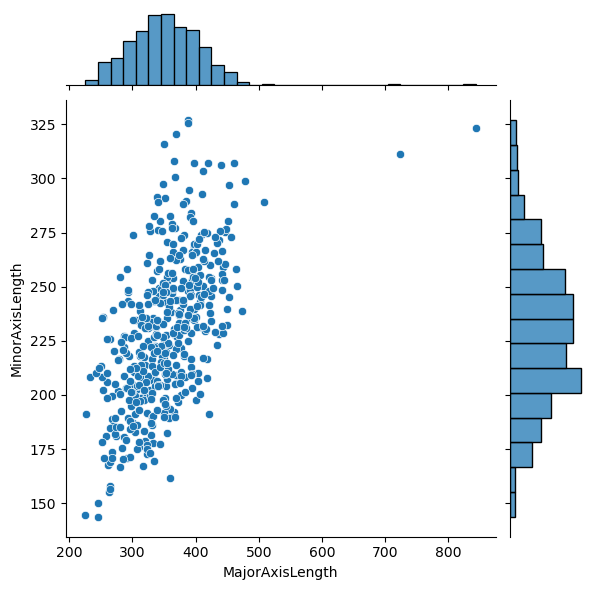

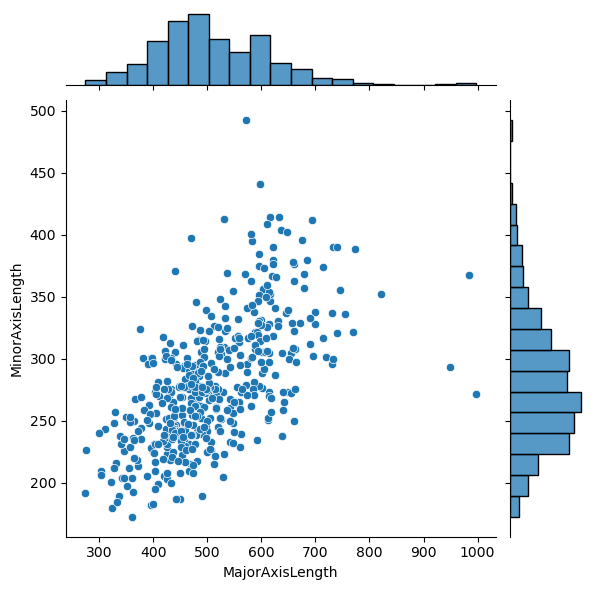

In [75]:
import seaborn as sns

Class1 = data.iloc[0:450,0:7]
Class2 = data.iloc[450:900,0:7]
Class1 = pd.DataFrame(Class1,columns=['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter'])
Class2 = pd.DataFrame(Class2,columns=['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter'])

sns.jointplot(x='MajorAxisLength', y='MinorAxisLength', data=Class1)
sns.jointplot(x='MajorAxisLength', y='MinorAxisLength', data=Class2)

V_Maj = Class1["MajorAxisLength"].var()
V_Min = Class1["MinorAxisLength"].var()

M_Maj = Class1["MajorAxisLength"].mean()
M_Min = Class1["MinorAxisLength"].mean()


#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

rv = multivariate_normal([M_Maj, M_Min], [[V_Maj, 0], [0, V_Min]])

## 6.

The likelihood ratio is:

$$
\frac{P(x|C_{1})}{P(x|C_{2})} = \frac{\frac{1}{\sqrt{2\pi}\sigma_{1}}exp[-\frac{(x-\mu_{1})^2}{2\sigma_{1}^2}]}{\frac{1}{\sqrt{2\pi}\sigma_{2}}exp[-\frac{(x-\mu_{2})^2}{2\sigma_{2}^2}]}
$$

$$ Kecimen:\> \mu_{1}= mean; \sigma_{1}= covariance; C_{1}= Kecimen\> class$$

$$ Besni:\> \mu_{2}= mean; \sigma_{2}= covariance; C_{2}= Besni\> class$$

## 7.

The discriminant function is:

$$
g_{i}(x) = p(x|C_{i})P(C_{i})
$$

equivalently:

$$
g_{i}(x) = log\>p(x|C_{i})+log\>P(C_{i})
$$

If can assume that $p(x|C_{i})$ are Gaussian, the equation becomes:

$$
g_{i}(x) = -\frac{1}{2}log\>2\pi-log\>\sigma_{i}-\frac{(x-\mu_{i})^2}{2\sigma_{i}^2}+log\>P(C_{i})
$$

In [76]:
# Use the data samples from class 1 


labels = [[0 for x in range(7)] for y in range(2)]
Sample_Data=np.vstack((result1[0],result2[0]))

print(Sample_Data)
print(Sample_Data.shape)
for i in range(2):
    for j in range(7):
        GC1 = np.log(np.exp(-(Sample_Data[i,j]-array1[j])**2 / (2*cov1[j,j])) / (2*np.pi * cov1[j,j])**(-1/2))
        GC2 = np.log(np.exp(-(Sample_Data[i,j]-array2[j])**2 / (2*cov2[j,j])) / (2*np.pi * cov2[j,j])**(-1/2))
        if GC1-GC2>0:
            labels[i][j]='Kecimen'
        else:
            labels[i][j]='Besni'
print()
#print(labels)
Attributes = ['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

print(labels)
print()
#saving it in a CSV file
with open('SampleLabels.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(Attributes)
    # Use writerows() not writerow()
    writer.writerows(labels)
    
with open('SampleLabels.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)


[[3.88254195e+04 2.79492295e+02 2.00637351e+02 6.75821606e-01
  4.19144570e+04 6.40060553e-01 8.16679874e+02]
 [1.03394104e+05 4.79999151e+02 2.79878450e+02 8.06268719e-01
  1.08800066e+05 6.78261776e-01 1.30087582e+03]]
(2, 7)

[['Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen'], ['Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni']]

['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
[]
['Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen']
[]
['Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni']
[]


## 8.

Pooling the covariance of all classes:

$$
S = \sum \limits_{i} \hat{P} (C_{i}) S_{i}
$$

So the discriminant function is:

$$
g_{i}(x) = -\frac{1}{2}(x-m_{i})^T S^{-1} (x-m_{i})+log\>\hat{P}(C_{i})
$$

$$
and \> \hat{P}(C_{i}) = \frac{\sum_{t} r_{i}^t}{N} = \frac{7}{14} = 0.5
$$

$$
m_{i} = \frac{\sum_{t} r_{i}^t x^t}{\sum_{t} r_{i}^t}
$$

$$
S_{i} = \frac{\sum_{t} r_{i}^t (x^t-m_{i})(x^t-m_{i})^T}{\sum_{t} r_{i}^t}
$$

$$
where\> r_{i}^t=1 \> if\> x^t \in C_{i} \>\> and\>0\>otherwise
$$

In [89]:
Pool_labels = [[0 for x in range(7)] for y in range(2)]
Covariance=pd.DataFrame.cov(df)
Cov = Covariance.to_numpy() #Covariance matrix of entire data

for i in range(2):
    for j in range(7):
        GC1 = np.log(np.exp(-(Sample_Data[i,j]-array1[j])**2 / (2*Cov[j,j])) / (2*np.pi * Cov[j,j])**(-1/2))
        GC2 = np.log(np.exp(-(Sample_Data[i,j]-array2[j])**2 / (2*Cov[j,j])) / (2*np.pi * Cov[j,j])**(-1/2))
        if GC1-GC2>0:
            Pool_labels[i][j]='Kecimen'
        else:
            Pool_labels[i][j]='Besni'
            
#print(Pool_labels)
Attributes = ['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

#saving it in a CSV file
with open('SampleLabels_Pool.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(Attributes)
    # Use writerows() not writerow()
    writer.writerows(Pool_labels)
    
with open('SampleLabels_Pool.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
[]
['Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen']
[]
['Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni']
[]


## 9.

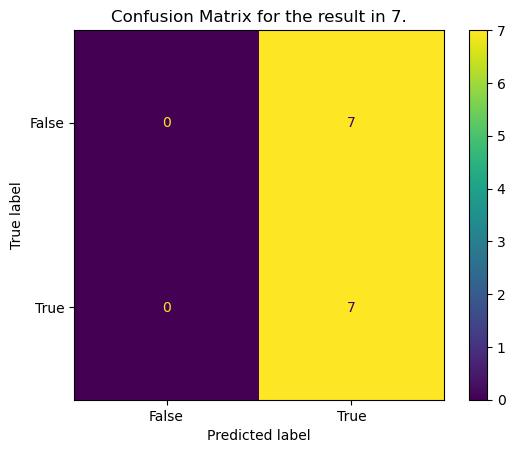

Accuracy: 0.5 



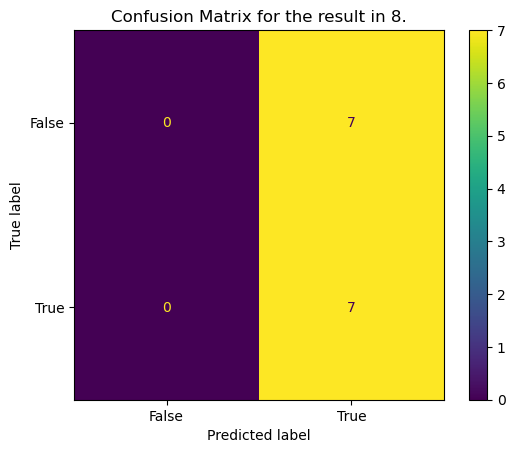

Accuracy (Pooling Covariances): 0.5 



In [92]:
from sklearn import metrics 

# Assigning '0' for Kecimen and '1' for Besni

# Since the sample we took is from class 'Kecimen', allocating '0' for actual sample data matrix
ActualSampleData = [[0 for x in range(7)] for y in range(2)]
for i in range(2):
    for j in range(7):
        ActualSampleData[i][j]= 0+i

Actual = np.concatenate((ActualSampleData[0],ActualSampleData[1]))
for i in range(2):
    for j in range(7):
        if labels[i][j] == 'Kecimen':
            labels[i][j]= 0
        else:
            labels[i][j]= 1
Predicted = np.concatenate((labels[0],labels[1]))


# Confusion matrix for one row of labels created from sample data we obtained from First Class
confusion_matrix = metrics.confusion_matrix(Actual,Predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix for the result in 7.")
plt.show()

Accuracy=(confusion_matrix[0,0]+confusion_matrix[1,1])/sum(sum(confusion_matrix))
print("Accuracy:",Accuracy,"\n")


# Confusion matrix for one row of labels from pooled results
for i in range(2):
    for j in range(7):
        if Pool_labels[i][j] == 'Kecimen':
            Pool_labels[i][j]= 0
        else:
            Pool_labels[i][j]= 1

Predicted_Pool = np.concatenate((Pool_labels[0],Pool_labels[1]))
confusion_matrix_pool = metrics.confusion_matrix(Actual,Predicted_Pool)

cm_display_pool = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_pool, display_labels = [False, True])

cm_display_pool.plot()
plt.title("Confusion Matrix for the result in 8.")
plt.show()
Accuracy_Pool=(confusion_matrix_pool[0,0]+confusion_matrix_pool[1,1])/sum(sum(confusion_matrix_pool))
print("Accuracy (Pooling Covariances):",Accuracy_Pool,"\n")